In [1]:
import glob
import numpy as np

# cognac data and tools
import cognac.insitu as insi

---
## load and select data

alees gps files may have to be edited manually 

In [2]:
# select campaign

#campaign = 'microco_leg2.yaml'
#campaign = 'lopstech19_leg1.yaml'
#campaign = 'lopstech19_leg2.yaml'
campaign = 'cognac20.yaml'

cp = insi.utils.campaign(campaign)

In [3]:
# data directory and filename

#unit = 'emetteur'
#unit = 'recepteur0'
#unit = 'recepteur1'
unit = 'recepteur2'

data_dir = cp[unit]['path']+'gps/'
gps_files = sorted(glob.glob(data_dir+'GPS_*.log'))
gps_all = insi.gps.read_gps_lops(gps_files, label=glabel, verbose=False)

Reads /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/recepteur2/gps/GPS_20201123113231.log
Reads /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/recepteur2/gps/GPS_20201124110434.log


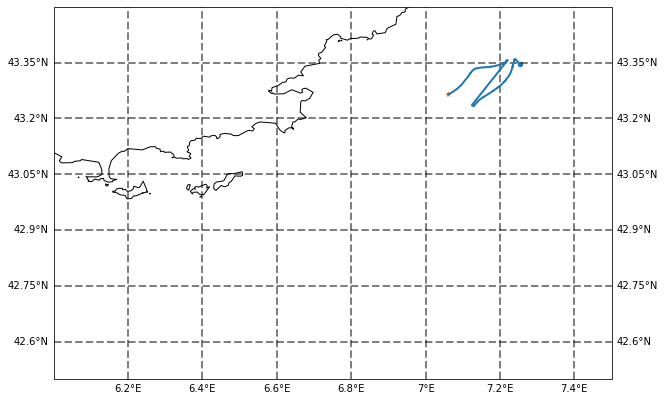

In [10]:
fac = insi.utils.plot_map(cp=cp)
gps_all.plot(fac)

In [5]:
gps_all.plot_bk(unit=cp['recepteur2'], rule='1T')

Loading BokehJS ...

---
## trim data

Look at acoustic data in order to choose time of deployment and recovery

In [6]:
#
# clean gps data with deployment log
gps={}
for r in cp[glabel]:
    gps[r.label] = gps_all.clean(r, inplace=False)

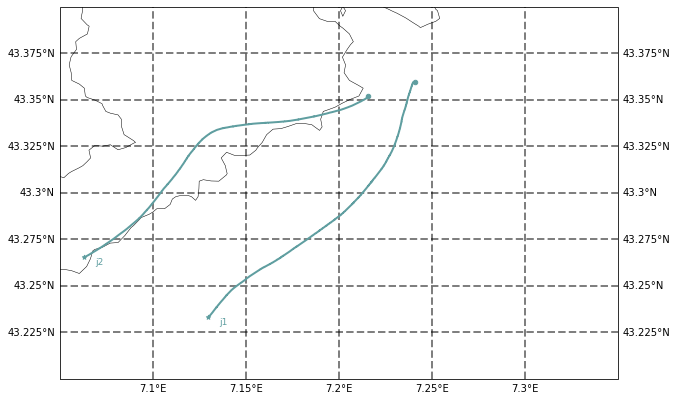

In [7]:
# plot overview map
fac = insi.utils.plot_map(cp=cp, ll_lim=[7.05, 7.35, 43.2, 43.4])
insi.utils.plot_bathy(fac)
for label, lgps in gps.items():
    lgps.plot(fac, label=label, color=cp[glabel]['color'])

--- 
## store

In [11]:
for label, lgps in gps.items():
    lgps.to_nc(cp.pathp+glabel+'_gps_'+label+'.nc')

Data store to /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/datap/recepteur2_gps_j1.nc
Data store to /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/datap/recepteur2_gps_j2.nc


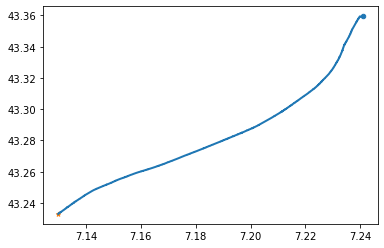

In [15]:
# reload
_gps = {}
for label, lgps in gps.items():
    _gps[label] = insi.gps.gps(file=cp.pathp+glabel+'_gps_'+label+'.nc')
_gps['j1'].plot()